# <en><center>Characterizing</center></en>

## Table of Contents

## Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

#### Dataset

In [3]:
data = np.loadtxt("C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Python for Statistical Analysis\\\
Characterising1D\\dataset.txt")

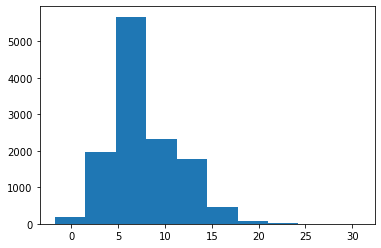

In [5]:
plt.hist(data);

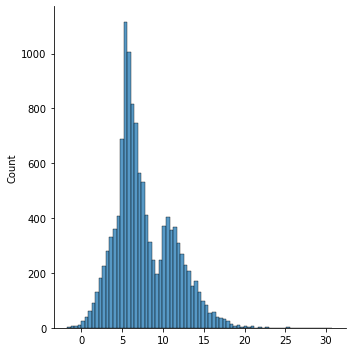

In [7]:
sns.displot(data)

## Calculating the Mean

In [ ]:


def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed/ len(xs)
print(get_mean([3,5,2,6]))


numpy average method also accepts an argument for weights. This makes it more flexible.

In [13]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


## Calculating the Median

In [16]:
def get_median(xs):
    mid = len(xs)//2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid-1 : mid + 1])
    
print(get_median([7,7,4,3,2,9,5]))

5


In [19]:
median = np.median(data)
print(median)

6.7325


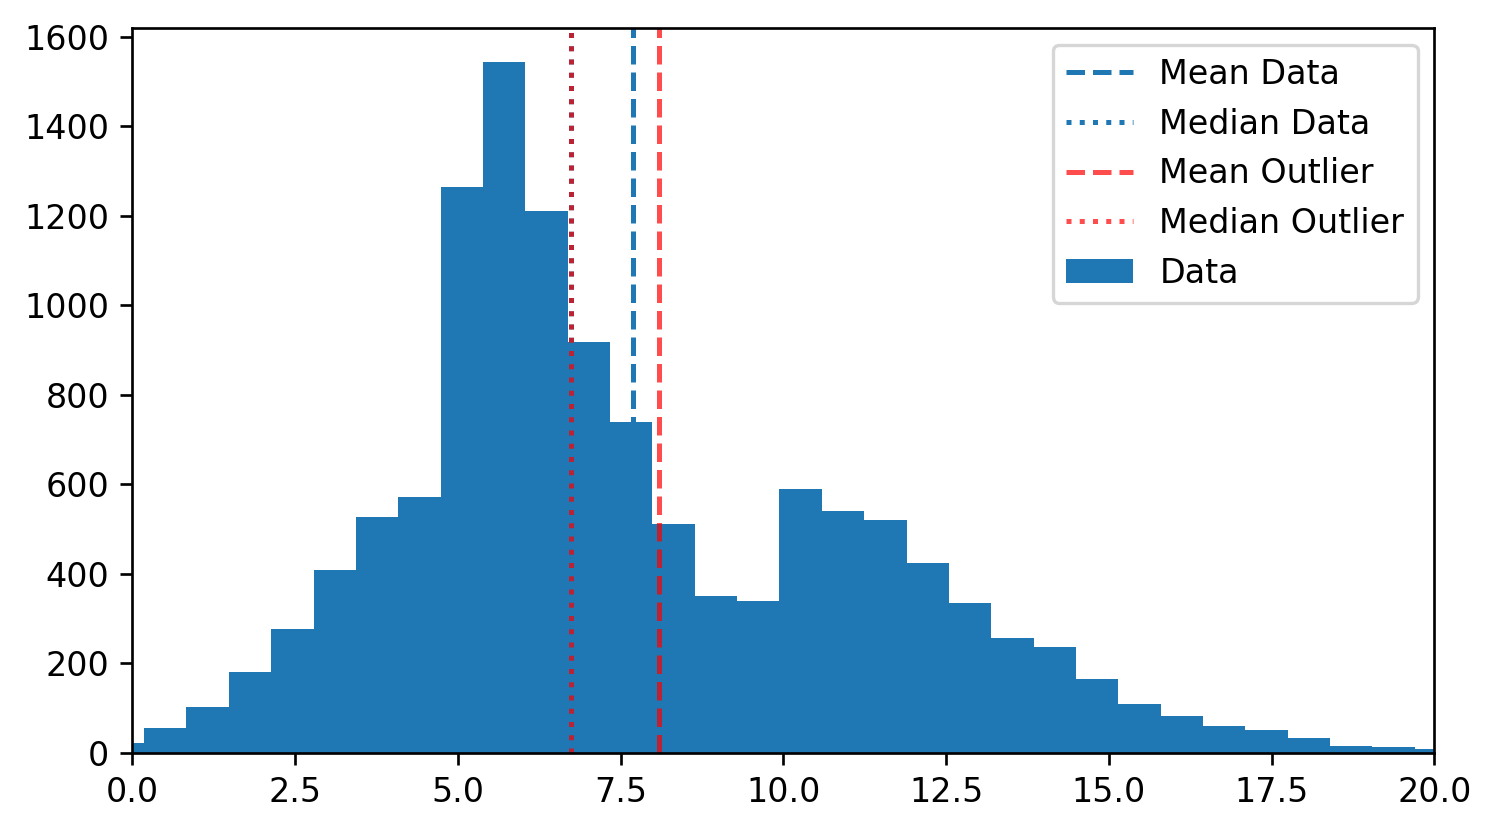

In [29]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

## Calculating the Mode

In [23]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts = True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,7,4,3,7,9,9,3,2,3,5,5,5,3]))

3


In [24]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [30]:
hist, edges = np.histogram(data, bins = 100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


There is a difference between the modes: 5.519 and 5.223165.
- We use a KDE plot to find the answer.
- The KDE is insensitive to the number of bins in the histogram plot.

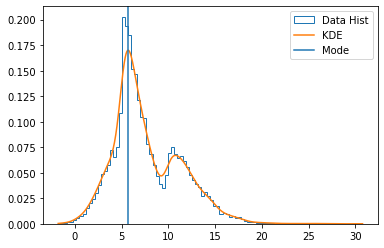

In [32]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins = 100, density = True, label = "Data Hist", histtype = "step")
plt.plot(xvals, yvals, label = "KDE")
plt.axvline(mode, label = "Mode")
plt.legend();